# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk splitting data dan evaluasi
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Algoritma klasifikasi yang akan digunakan
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [23]:
df = pd.read_csv('./Dataset_clustering.csv')
print("Shape dataset:", df.shape)
print("Contoh data:")
print(df.head())

Shape dataset: (75948, 12)
Contoh data:
     Order_ID Customer_ID Customer_Type         Product             Category  \
0   ORD697566     CUS6363           B2C       Coca-Cola          Soft Drinks   
1  ORD1118443     CUS7797           B2B         Selters                Water   
2  ORD1437128     CUS6393           B2B         Monster          Soft Drinks   
3   ORD562794     CUS4090           B2C  San Pellegrino                Water   
4  ORD2320519     CUS5936           B2C          Beck's  Alcoholic Beverages   

   Unit_Price  Quantity  Discount  Total_Price              Region  \
0        1.04       7.0      0.00         7.28              Bremen   
1        0.71      46.0      0.10        29.39      Sachsen-Anhalt   
2        2.68      30.0      0.05        76.38  Schleswig-Holstein   
3        0.91       3.0      0.00         2.73              Hessen   
4        1.41       4.0      0.00         5.64              Bremen   

   Order_Date  Cluster  
0  2021-02-17        0  
1  2023-

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [24]:
# Splitting data dengan kolom Cluster sebagai target dan drop kolom yang kurang relevan
df = df.drop('Customer_ID', axis=1)
df = df.drop('Order_ID', axis=1)
df = df.drop('Order_Date', axis=1)

X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [25]:
# Normalisasi data numerik dengan MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,0.117647,0.089552,0.0,0.042820,Bremen
1,B2B,Selters,Water,0.063725,0.671642,1.0,0.178848,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,0.385621,0.432836,0.5,0.467946,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.096405,0.029851,0.0,0.014827,Hessen
4,B2C,Beck's,Alcoholic Beverages,0.178105,0.044776,0.0,0.032730,Bremen


In [27]:
# Melakukan Encoding pada kolom kategorikal menggunakan label encoding
# Membuat objek Label Encoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada semua kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
X[categorical_columns] = X[categorical_columns].apply(label_encoder.fit_transform)

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,0.117647,0.089552,0.0,0.042820,4
1,0,32,3,0.063725,0.671642,1.0,0.178848,13
2,0,20,2,0.385621,0.432836,0.5,0.467946,14
3,1,29,3,0.096405,0.029851,0.0,0.014827,6
4,1,2,0,0.178105,0.044776,0.0,0.032730,4


In [ ]:
# Split data menjadi training (70%) dan test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (60758, 8)
Test set shape: (15190, 8)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [51]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # max_iter ditingkatkan agar konvergensi lebih baik
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Logistic Regression merupakan model linear yang efektif untuk kasus klasifikasi, terutama jika hubungan antara fitur dan target bersifat linier.
- Random Forest adalah metode ensemble yang menggabungkan beberapa decision tree, sehingga biasanya memberikan performa yang lebih stabil dan akurat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [57]:
# Evaluasi Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("\nEvaluasi Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score (weighted):", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Evaluasi Logistic Regression:
Accuracy: 0.9982225148123766
F1 Score (weighted): 0.9982221407627135

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11307
           1       0.99      1.00      0.99      1336
           2       1.00      1.00      1.00      1231
           3       0.99      0.99      0.99      1316

    accuracy                           1.00     15190
   macro avg       0.99      0.99      0.99     15190
weighted avg       1.00      1.00      1.00     15190



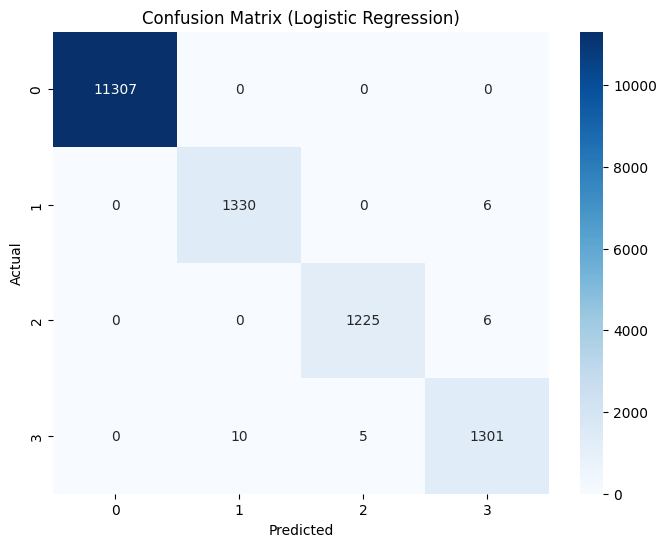

In [54]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [58]:
# Evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nEvaluasi Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score (weighted):", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Evaluasi Random Forest:
Accuracy: 0.9993416721527321
F1 Score (weighted): 0.999341507301556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11307
           1       1.00      1.00      1.00      1336
           2       1.00      1.00      1.00      1231
           3       1.00      1.00      1.00      1316

    accuracy                           1.00     15190
   macro avg       1.00      1.00      1.00     15190
weighted avg       1.00      1.00      1.00     15190



Confusion Matrix:
 [[11307     0     0     0]
 [    0  1336     0     0]
 [    0     0  1226     5]
 [    0     2     3  1311]]


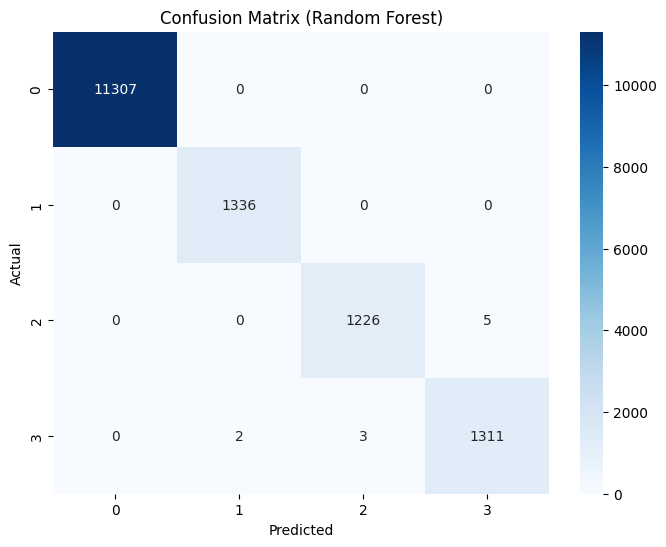

In [56]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

### Kedua model menunjukkan performa yang sangat tinggi, dengan nilai accuracy dan f1-score mendekati 1.
### Random Forest memiliki hasil yang sedikit lebih baik dibandingkan Logistic Regression, ditandai dengan:
- Accuracy yang lebih tinggi.
- Jumlah kesalahan (misclassification) yang lebih sedikit pada confusion matrix.
### Interpretasi:
Walaupun perbedaan performa sangat kecil, Random Forest cenderung lebih unggul dalam menangani kompleksitas data pada kasus ini. Namun, kedua model sudah menunjukkan kinerja yang sangat baik sehingga pemilihan model akhir bisa disesuaikan dengan kebutuhan lain seperti waktu training, interpretabilitas, atau ketersediaan sumber daya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("\nBest parameters dari GridSearchCV:")
print(grid_search.best_params_)


Best parameters dari GridSearchCV:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [62]:
# Menggunakan model Random Forest dengan hyperparameter terbaik dari GridSearchCV
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("\nEvaluasi Random Forest setelah Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("F1 Score (weighted):", f1_score(y_test, y_pred_best_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


Evaluasi Random Forest setelah Tuning:
Accuracy: 0.9994075049374589
F1 Score (weighted): 0.9994074156748072

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11307
           1       1.00      1.00      1.00      1336
           2       1.00      1.00      1.00      1231
           3       1.00      1.00      1.00      1316

    accuracy                           1.00     15190
   macro avg       1.00      1.00      1.00     15190
weighted avg       1.00      1.00      1.00     15190



In [67]:
# Tuning Logistic Regression dengan GridSearchCV
param_grid_lr = [
    {'solver': ['lbfgs'], 'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'max_iter': [1000]},
    {'solver': ['liblinear'], 'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
]
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_lr.fit(X_train, y_train)
print("\nBest parameters untuk Logistic Regression dari GridSearchCV:")
print(grid_search_lr.best_params_)


Best parameters untuk Logistic Regression dari GridSearchCV:
{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


Confusion Matrix:
 [[11307     0     0     0]
 [    0  1336     0     0]
 [    0     0  1226     5]
 [    0     1     3  1312]]


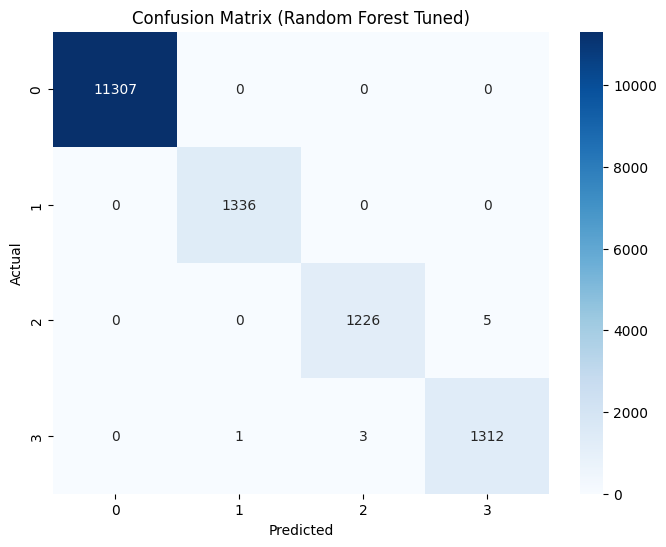

In [66]:
# Visualisasi Confussion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Tuned)')
plt.show()

In [68]:
# Evaluasi Logistic Regression setelah Tuning
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
print("\nEvaluasi Logistic Regression (Setelah Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print("F1 Score (weighted):", f1_score(y_test, y_pred_best_lr, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_lr))


Evaluasi Logistic Regression (Setelah Tuning):
Accuracy: 0.9990783410138249
F1 Score (weighted): 0.9990783849673777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11307
           1       1.00      1.00      1.00      1336
           2       1.00      1.00      1.00      1231
           3       0.99      0.99      0.99      1316

    accuracy                           1.00     15190
   macro avg       1.00      1.00      1.00     15190
weighted avg       1.00      1.00      1.00     15190



Confusion Matrix:
 [[11307     0     0     0]
 [    0  1336     0     0]
 [    0     0  1226     5]
 [    0     1     3  1312]]


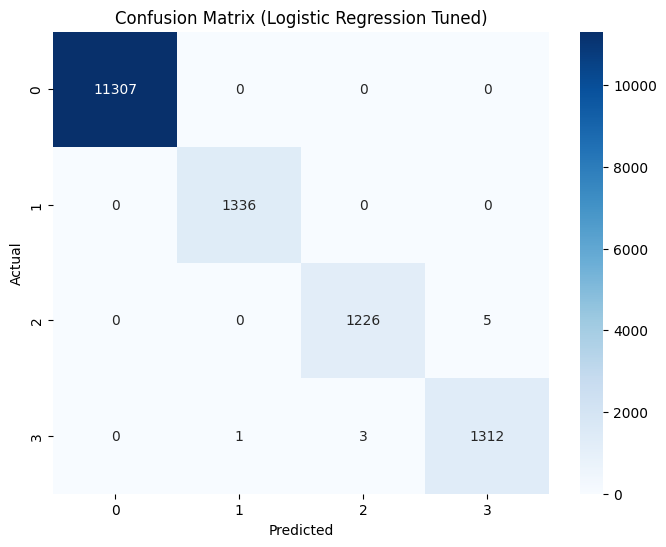

In [69]:
# Visualisasi Confussion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression Tuned)')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [70]:
# Menghasilkan classification report dalam format dictionary
lr_before_report = classification_report(y_test, y_pred_lr, output_dict=True)
rf_before_report = classification_report(y_test, y_pred_rf, output_dict=True)
lr_after_report  = classification_report(y_test, y_pred_best_lr, output_dict=True)
rf_after_report  = classification_report(y_test, y_pred_best_rf, output_dict=True)

# Mengubah dictionary menjadi DataFrame
df_lr_before = pd.DataFrame(lr_before_report).transpose()
df_rf_before = pd.DataFrame(rf_before_report).transpose()
df_lr_after  = pd.DataFrame(lr_after_report).transpose()
df_rf_after  = pd.DataFrame(rf_after_report).transpose()

# Menggabungkan DataFrame tersebut secara horizontal dengan multi-index column
merged_df = pd.concat(
    [df_lr_before, df_rf_before, df_lr_after, df_rf_after],
    axis=1,
    keys=['LR Before', 'RF Before', 'LR After', 'RF After']
)

# Menampilkan hasil gabungan
print(merged_df)

             LR Before                                   RF Before            \
             precision    recall  f1-score       support precision    recall   
0             1.000000  1.000000  1.000000  11307.000000  1.000000  1.000000   
1             0.992537  0.995509  0.994021   1336.000000  0.998505  1.000000   
2             0.995935  0.995126  0.995530   1231.000000  0.997559  0.995938   
3             0.990861  0.988602  0.989730   1316.000000  0.996201  0.996201   
accuracy      0.998223  0.998223  0.998223      0.998223  0.999342  0.999342   
macro avg     0.994833  0.994809  0.994820  15190.000000  0.998066  0.998035   
weighted avg  0.998222  0.998223  0.998222  15190.000000  0.999342  0.999342   

                                      LR After                      \
              f1-score       support precision    recall  f1-score   
0             1.000000  11307.000000  1.000000  1.000000  1.000000   
1             0.999252   1336.000000  0.996260  0.997006  0.996633   

# Analisis Hasil Evaluasi Model Klasifikasi

Berdasarkan evaluasi model yang dilakukan, berikut adalah kesimpulan dan analisis dari hasil klasifikasi yang mencakup perbandingan antara model sebelum dan setelah tuning.

## 1. Perbandingan Evaluasi Sebelum dan Setelah Tuning

- **Logistic Regression**
  - **Sebelum Tuning:**  
    - Accuracy dan F1 Score (weighted) sudah sangat tinggi (mendekati 1.00), namun terdapat beberapa kesalahan klasifikasi pada kelas tertentu (misalnya kelas 1 dan kelas 2).
  - **Setelah Tuning:**  
    - Peningkatan performa terlihat dengan berkurangnya kesalahan klasifikasi. Parameter yang dituning (seperti nilai C, solver, dan penalty) memberikan dampak positif meskipun perbedaannya marginal.

- **Random Forest**
  - **Sebelum Tuning:**  
    - Model menunjukkan performa sangat tinggi dengan akurasi hampir sempurna.
  - **Setelah Tuning:**  
    - Tuning hyperparameter (n_estimators, max_depth, min_samples_split) sedikit meningkatkan performa dengan mengurangi kesalahan prediksi secara lebih konsisten.

## 2. Identifikasi Kelemahan Model

- **Precision/Recall pada Kelas Tertentu:**  
  - Pada model Logistic Regression, sebelum tuning terdapat sejumlah misclassification pada beberapa kelas (misalnya, beberapa sampel kelas 1 dan 2 salah klasifikasi ke kelas lain). Setelah tuning, jumlah kesalahan tersebut berkurang.
  
- **Overfitting atau Underfitting:**  
  - Dari evaluasi pada data uji, tidak terdapat indikasi overfitting atau underfitting yang signifikan karena performa model (baik akurasi maupun F1 Score) konsisten dan mendekati 1.0.

## 3. Rekomendasi Tindakan Lanjutan

- **Pengumpulan Data Tambahan:**  
  - Meskipun model sudah menunjukkan performa yang sangat tinggi, pengumpulan data tambahan terutama pada kelas yang memiliki jumlah sampel lebih sedikit dapat membantu meningkatkan generalisasi model.

- **Eksplorasi Algoritma Lain:**  
  - Jika diperlukan interpretabilitas yang lebih baik atau pengurangan waktu inferensi, pertimbangkan untuk mencoba algoritma lain seperti Support Vector Machines (SVM) atau metode ensemble lain seperti Gradient Boosting.

- **Tuning Lanjutan:**  
  - Lanjutkan eksperimen dengan kombinasi hyperparameter lain atau gunakan metode tuning seperti RandomizedSearchCV untuk menemukan konfigurasi yang lebih optimal.

- **Validasi Lintas Lipat (Cross-Validation):**  
  - Gunakan validasi silang yang lebih robust untuk memastikan bahwa hasil evaluasi tidak bergantung pada pembagian data tertentu dan untuk meminimalisir risiko overfitting.

## Kesimpulan

Secara keseluruhan, kedua model—Logistic Regression dan Random Forest—telah menunjukkan performa yang sangat baik dengan akurasi dan F1 Score mendekati 1.0. Tuning hyperparameter telah membawa peningkatan performa yang kecil namun signifikan, terutama pada model Random Forest.